In [288]:
# we need the following libraries and modules for this example
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [289]:
# Load Dataset
raw_data = pd.read_csv(r'E:\Data Science\house-prices-advanced-regression-techniques\train.csv')
pd.set_option('display.max_columns', None)
raw_data# explore the top 5 rows of the raw_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL        65.00     8450   Pave   NaN      Reg   
1        2          20       RL        80.00     9600   Pave   NaN      Reg   
2        3          60       RL        68.00    11250   Pave   NaN      IR1   
3        4          70       RL        60.00     9550   Pave   NaN      IR1   
4        5          60       RL        84.00    14260   Pave   NaN      IR1   
5        6          50       RL        85.00    14115   Pave   NaN      IR1   
6        7          20       RL        75.00    10084   Pave   NaN      Reg   
7        8          60       RL          nan    10382   Pave   NaN      IR1   
8        9          50       RM        51.00     6120   Pave   NaN      Reg   
9       10         190       RL        50.00     7420   Pave   NaN      Reg   
10      11          20       RL        70.00    11200   Pave   NaN      Reg   
11      12          60       RL        85.00    11924   Pave   NaN      IR1   
12      13          20       RL          nan    12968   Pave   NaN      IR2   
13      14          20       RL        91.00    10652   Pave   NaN      IR1   
14      15          20       RL          nan    10920   Pave   NaN      IR1   
15      16          45       RM        51.00     6120   Pave   NaN      Reg   
16      17          20       RL          nan    11241   Pave   NaN      IR1   
17      18          90       RL        72.00    10791   Pave   NaN      Reg   
18      19          20       RL        66.00    13695   Pave   NaN      Reg   
19      20          20       RL        70.00     7560   Pave   NaN      Reg   
20      21          60       RL       101.00    14215   Pave   NaN      IR1   
21      22          45       RM        57.00     7449   Pave  Grvl      Reg   
22      23          20       RL        75.00     9742   Pave   NaN      Reg   
23      24         120       RM        44.00     4224   Pave   NaN      Reg   
24      25          20       RL          nan     8246   Pave   NaN      IR1   
25      26          20       RL       110.00    14230   Pave   NaN      Reg   
26      27          20       RL        60.00     7200   Pave   NaN      Reg   
27      28          20       RL        98.00    11478   Pave   NaN      Reg   
28      29          20       RL        47.00    16321   Pave   NaN      IR1   
29      30          30       RM        60.00     6324   Pave   NaN      IR1   
30      31          70  C (all)        50.00     8500   Pave  Pave      Reg   
31      32          20       RL          nan     8544   Pave   NaN      IR1   
32      33          20       RL        85.00    11049   Pave   NaN      Reg   
33      34          20       RL        70.00    10552   Pave   NaN      IR1   
34      35         120       RL        60.00     7313   Pave   NaN      Reg   
35      36          60       RL       108.00    13418   Pave   NaN      Reg   
36      37          20       RL       112.00    10859   Pave   NaN      Reg   
37      38          20       RL        74.00     8532   Pave   NaN      Reg   
38      39          20       RL        68.00     7922   Pave   NaN      Reg   
39      40          90       RL        65.00     6040   Pave   NaN      Reg   
40      41          20       RL        84.00     8658   Pave   NaN      Reg   
41      42          20       RL       115.00    16905   Pave   NaN      Reg   
42      43          85       RL          nan     9180   Pave   NaN      IR1   
43      44          20       RL          nan     9200   Pave   NaN      IR1   
44      45          20       RL        70.00     7945   Pave   NaN      Reg   
45      46         120       RL        61.00     7658   Pave   NaN      Reg   
46      47          50       RL        48.00    12822   Pave   NaN      IR1   
47      48          20       FV        84.00    11096   Pave   NaN      Reg   
48      49         190       RM        33.00     4456   Pave   NaN      Reg   
49      50          20       RL        66.00     7742   Pa

### Exploring the descriptive statistics of the variables

In [290]:
#Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley  \
count  1460.00     1460.00     1460      1201.00   1460.00   1460    91   
unique     nan         nan        5          nan       nan      2     2   
top        nan         nan       RL          nan       nan   Pave  Grvl   
freq       nan         nan     1151          nan       nan   1454    50   
mean    730.50       56.90      NaN        70.05  10516.83    NaN   NaN   
std     421.61       42.30      NaN        24.28   9981.26    NaN   NaN   
min       1.00       20.00      NaN        21.00   1300.00    NaN   NaN   
25%     365.75       20.00      NaN        59.00   7553.50    NaN   NaN   
50%     730.50       50.00      NaN        69.00   9478.50    NaN   NaN   
75%    1095.25       70.00      NaN        80.00  11601.50    NaN   NaN   
max    1460.00      190.00      NaN       313.00 215245.00    NaN   NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1460        1460      1460      1460      1460         1460   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        925        1311      1459      1052      1382          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460      1460.00      1460.00   
unique          9          8        5          8          nan          nan   
top          Norm       Norm     1Fam     1Story          nan          nan   
freq         1260       1445     1220        726          nan          nan   
mean          NaN        NaN      NaN        NaN         6.10         5.58   
std           NaN        NaN      NaN        NaN         1.38         1.11   
min           NaN        NaN      NaN        NaN         1.00         1.00   
25%           NaN        NaN      NaN        NaN         5.00         5.00   
50%           NaN        NaN      NaN        NaN         6.00         5.00   
75%           NaN        NaN      NaN        NaN         7.00         6.00   
max           NaN        NaN      NaN        NaN        10.00         9.00   

        YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count     1460.00       1460.00      1460     1460        1460        1460   
unique        nan           nan         6        8          15          16   
top           nan           nan     Gable  CompShg     VinylSd     VinylSd   
freq          nan           nan      1141     1434         515         504   
mean      1971.27       1984.87       NaN      NaN         NaN         NaN   
std         30.20         20.65       NaN      NaN         NaN         NaN   
min       1872.00       1950.00       NaN      NaN         NaN         NaN   
25%       1954.00       1967.00       NaN      NaN         NaN         NaN   
50%       1973.00       1994.00       NaN      NaN         NaN         NaN   
75%       2000.00       2004.00       NaN      NaN         NaN         NaN   
max       2010.00       2010.00       NaN      NaN         NaN         NaN   

       MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452     1452.00      1460      1460       1460     1423   
unique          4         nan         4         5          6        4   
top          None         nan        TA        TA      PConc       TA   
freq          864         nan       906      1282       

### Lets Check the missing values

In [291]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data=raw_data.copy()
data.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

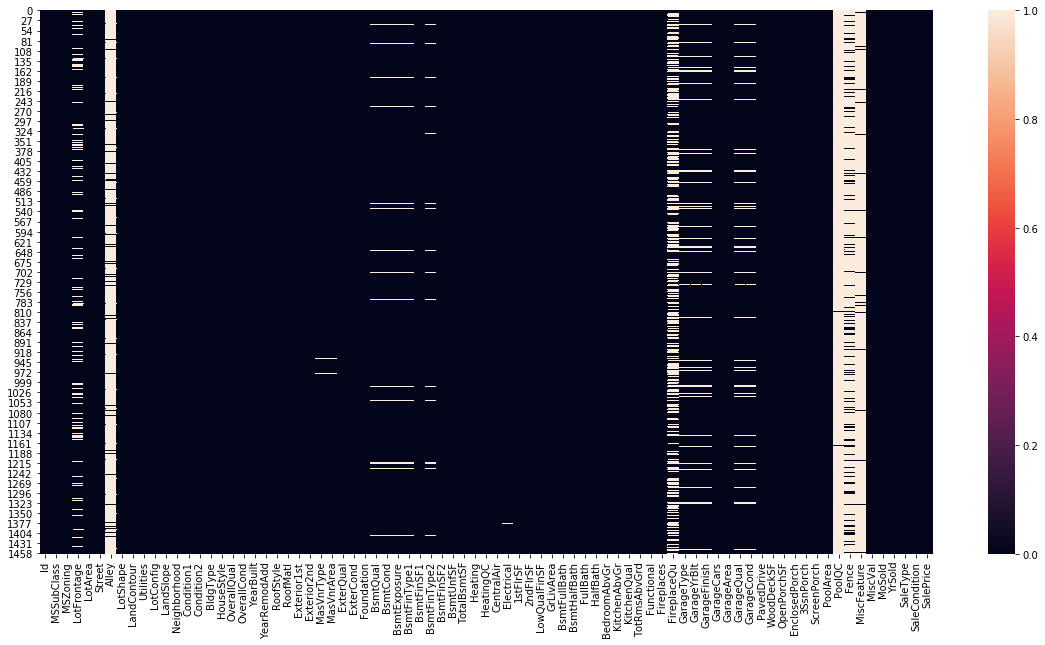

In [292]:
#Visualizing missing values using heat maps
plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull())
plt.show()

In [293]:
len(data)

1460

In [294]:
null_feature = data.isnull().sum()/len(data)*100
null_feature = null_feature[null_feature>0]
null_feature.sort_values(inplace=True, ascending=False)
null_feature

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [295]:
# .to_frame()is used to convert the given series object to a dataframe
null_feature =null_feature.to_frame()

In [296]:
null_feature

0
PoolQC       99.52
MiscFeature  96.30
Alley        93.77
Fence        80.75
FireplaceQu  47.26
LotFrontage  17.74
GarageYrBlt   5.55
GarageType    5.55
GarageFinish  5.55
GarageQual    5.55
GarageCond    5.55
BsmtFinType2  2.60
BsmtExposure  2.60
BsmtFinType1  2.53
BsmtCond      2.53
BsmtQual      2.53
MasVnrArea    0.55
MasVnrType    0.55
Electrical    0.07

In [297]:
null_feature.columns = ['count']

In [298]:
null_feature.index.names = ['Feature_Name']


In [299]:
null_feature['Feature_Name'] = null_feature.index

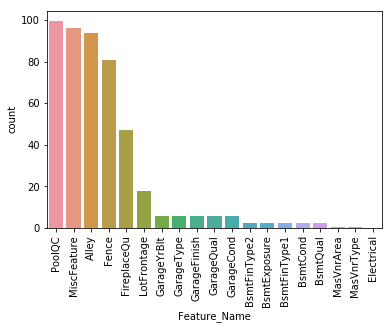

In [300]:
sns.barplot(x='Feature_Name', y='count', data=null_feature)
plt.xticks(rotation = 90)
plt.show()

## Impute missing values

In [301]:
data['PoolQC'] = data['PoolQC'].fillna('None') # as most of the values were NAN we can fill it with none

In [302]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [303]:
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [304]:
for features in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[features] = data[features].fillna('None')

In [305]:
for features in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    data[features] = data[features].fillna(int(0))

In [306]:
for features in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    data[features] = data[features].fillna('None')

In [307]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(int(0))

In [308]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [309]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical']).mode()[0]

In [310]:
data.isnull().sum()# we dont have any missing values, Lets jump to the feature selection part

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [311]:
numerical_feature=data.select_dtypes(exclude=['object'])

In [312]:
numerical_feature.head()
numerical_feature.shape

(1460, 38)

In [313]:
numerical_feature.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1460.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.20  10516.83         6.10         5.58   
std    421.61       42.30        22.43   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        60.00   7553.50         5.00         5.00   
50%    730.50       50.00        70.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1460.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.12      443.64       46.55     567.24   
std        30.20         20.65      180.73      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      164.25      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1460.00     1460.00     1460.00   
mean           6.52        0.61      1868.74        1.77      472.98   
std            1.63        0.64       453.70        0.75      213.80   
min            2.00        0.00         0.00        0.00        0.00   
25%            5.00        0.00      1958.00        1.00      334.50   
50%            6.00        1.00      1977.00        2.00      480.00   
75%            7.00        1.00      2001.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00           0.00   

### Correlation is designed to give us a measure indicating by its value if a statistical relationship exists or not between two quantitative variables. This can be better represented by heat maps of correlated features using the seaborn library.

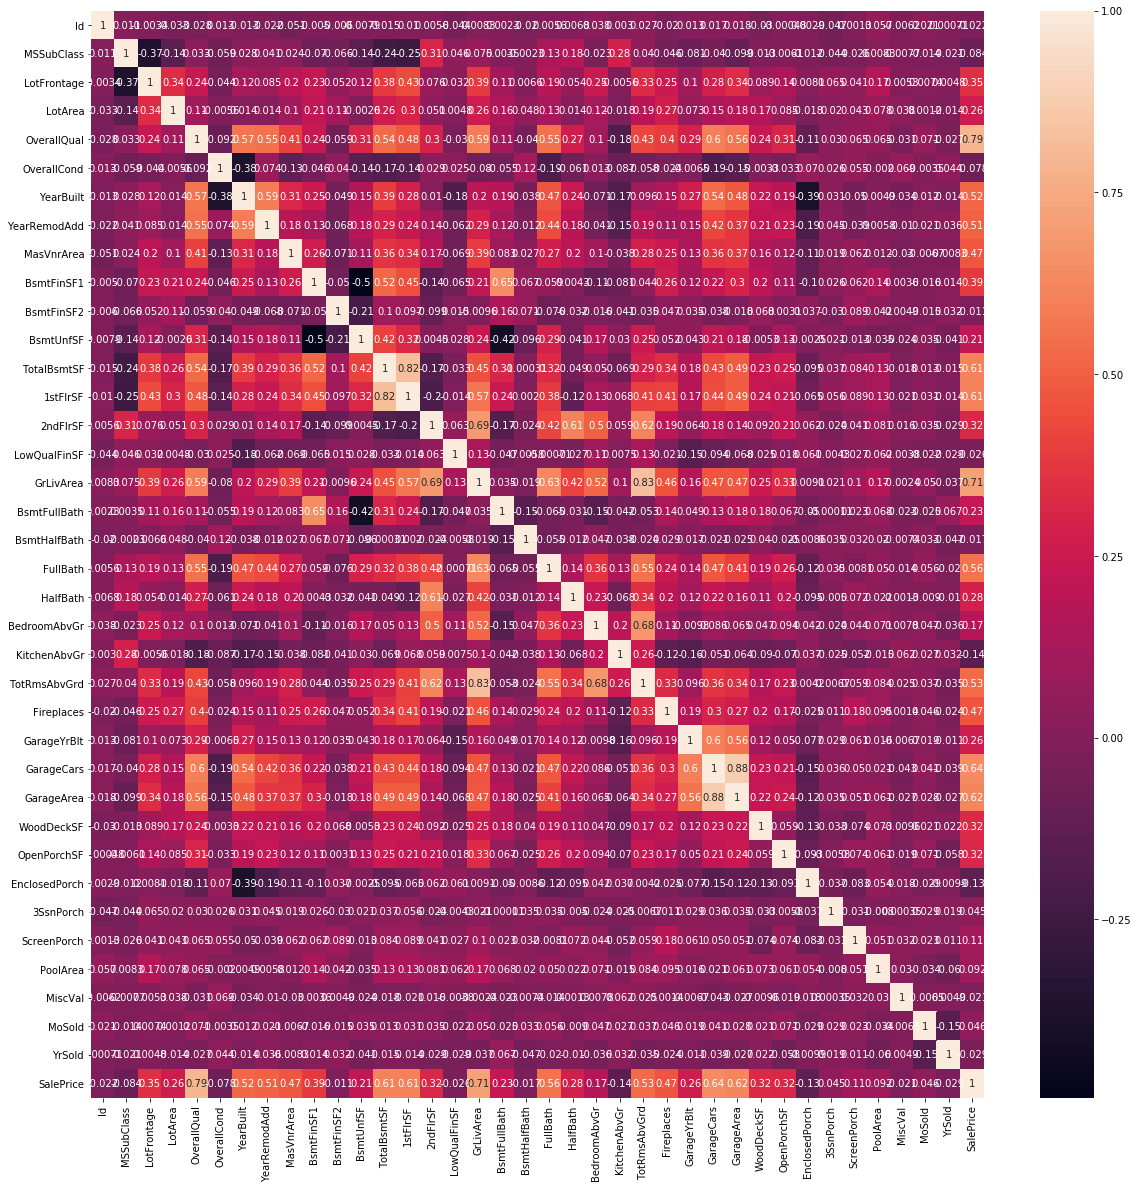

In [314]:
import seaborn as sns
corr_mat = numerical_feature.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(numerical_feature[top_corr_features].corr(),annot=True)

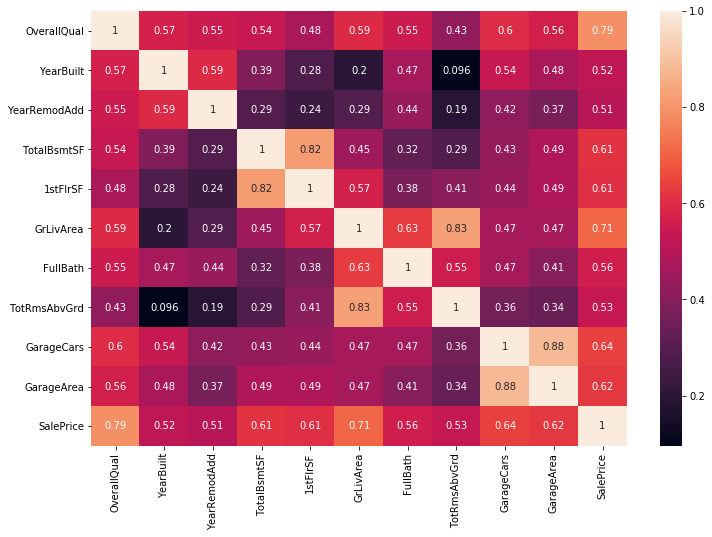

In [315]:
top_feature = corr_mat.index[abs(corr_mat['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = numerical_feature[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

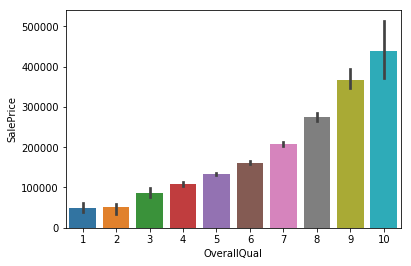

In [316]:
sns.barplot(data.OverallQual, data.SalePrice) #As the quality increases the price also increases which is quite obvious. This shows why the correlation has high for these two features

In [317]:
print("Find most important features relative to target")
corr_mat.sort_values(['SalePrice'], ascending=False, inplace=True)
corr_mat.SalePrice

Find most important features relative to target


SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.47
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
GarageYrBlt      0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
Id              -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

## Target variable

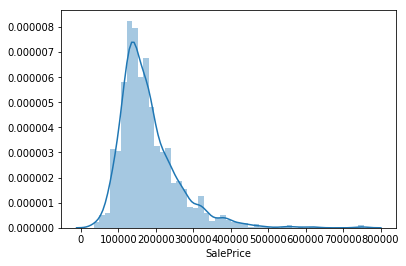

In [318]:
# We can check the PDF check whether the result is distributed in the same way overall
sns.distplot(data['SalePrice'])

In [319]:
# Let's transform 'Price' with a log transformation
log_Sale_price = np.log(data['SalePrice'])

# Then we add it to our data frame
data['log_Sale_price'] = log_Sale_price
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave  None      Reg   
1   2          20       RL        80.00     9600   Pave  None      Reg   
2   3          60       RL        68.00    11250   Pave  None      IR1   
3   4          70       RL        60.00     9550   Pave  None      IR1   
4   5          60       RL        84.00    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

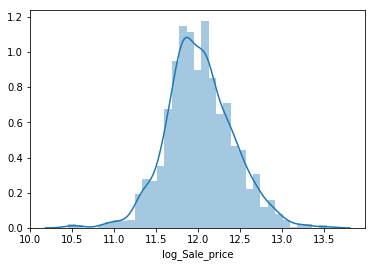

In [320]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall

sns.distplot(data['log_Sale_price'])

In [321]:
data_cleaned=data.copy()

In [322]:
non_numerical=data_cleaned.select_dtypes(include=['object'])
col=non_numerical.columns

In [323]:
from sklearn.preprocessing import LabelEncoder
for c in col:
    lbl = LabelEncoder() 
    lbl.fit(list(data_cleaned[c].values)) 
    data_cleaned[c] = lbl.transform(list(data_cleaned[c].values))

In [324]:
data_cleaned

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3        65.00     8450       1      1   
1        2          20         3        80.00     9600       1      1   
2        3          60         3        68.00    11250       1      1   
3        4          70         3        60.00     9550       1      1   
4        5          60         3        84.00    14260       1      1   
5        6          50         3        85.00    14115       1      1   
6        7          20         3        75.00    10084       1      1   
7        8          60         3        80.00    10382       1      1   
8        9          50         4        51.00     6120       1      1   
9       10         190         3        50.00     7420       1      1   
10      11          20         3        70.00    11200       1      1   
11      12          60         3        85.00    11924       1      1   
12      13          20         3        71.00    12968       1      1   
13      14          20         3        91.00    10652       1      1   
14      15          20         3        73.00    10920       1      1   
15      16          45         4        51.00     6120       1      1   
16      17          20         3        73.00    11241       1      1   
17      18          90         3        72.00    10791       1      1   
18      19          20         3        66.00    13695       1      1   
19      20          20         3        70.00     7560       1      1   
20      21          60         3       101.00    14215       1      1   
21      22          45         4        57.00     7449       1      0   
22      23          20         3        75.00     9742       1      1   
23      24         120         4        44.00     4224       1      1   
24      25          20         3        71.00     8246       1      1   
25      26          20         3       110.00    14230       1      1   
26      27          20         3        60.00     7200       1      1   
27      28          20         3        98.00    11478       1      1   
28      29          20         3        47.00    16321       1      1   
29      30          30         4        60.00     6324       1      1   
30      31          70         0        50.00     8500       1      2   
31      32          20         3        71.00     8544       1      1   
32      33          20         3        85.00    11049       1      1   
33      34          20         3        70.00    10552       1      1   
34      35         120         3        60.00     7313       1      1   
35      36          60         3       108.00    13418       1      1   
36      37          20         3       112.00    10859       1      1   
37      38          20         3        74.00     8532       1      1   
38      39          20         3        68.00     7922       1      1   
39      40          90         3        65.00     6040       1      1   
40      41          20         3        84.00     8658       1      1   
41      42          20         3       115.00    16905       1      1   
42      43          85         3        66.50     9180       1      1   
43      44          20         3        70.00     9200       1      1   
44      45          20         3        70.00     7945       1      1   
45      46         120         3        61.00     7658       1      1   
46      47          50         3        48.00    12822       1      1   
47      48          20         1        84.00    11096       1      1   
48      49         190         4        33.00     4456       1      1   
49      50          20         3        66.00     7742       1      1   
50      51          60         3        65.00    13869       1      1   
51      52          50         4        52.00     6240       1      1   
52      53          90         4       110.00     8472       0      1   
53      54          20         3        68.00    50271       1    

In [325]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['SalePrice'],axis=1)
data_cleaned.shape

(1460, 81)

In [326]:
target=data_cleaned['log_Sale_price'] # since we have defined our target variable we have to delete it from the data set

In [327]:
# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_cleaned.drop(['log_Sale_price'],axis=1)

In [328]:
# Import the module for the split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)
# Split the variables with an 80-20 split and some random state


### Linear Regression

In [329]:
# Create a linear regression object
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Fit the regression with the inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [330]:
# Let's check the outputs of the regression
# I'll store them in y_hat_linear as this is the 'theoretical' name of the predictions
y_hat_linear = reg.predict(x_train)

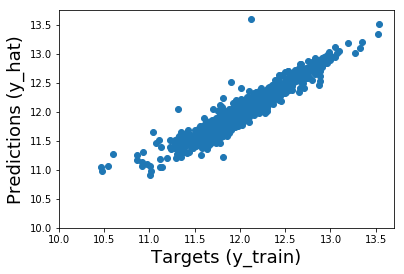

In [331]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat_linear) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat_linear)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_linear)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10)
plt.ylim(10)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

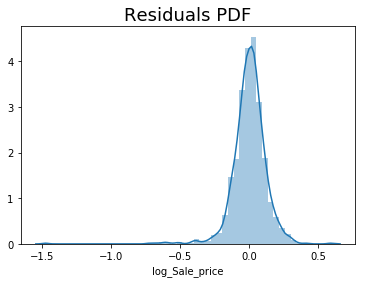

In [332]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat_linear)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat_linear (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [333]:
# Find the R-squared of the model
reg.score(x_train,y_train)




0.9054908138805378

## Testing

In [334]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_linear_test = reg.predict(x_test)

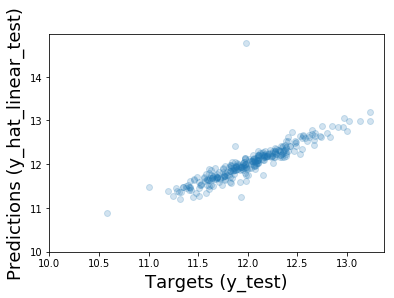

In [335]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_linear_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_linear_test)',size=18)
plt.xlim(10)
plt.ylim(10)
plt.show()

In [336]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_linear_test), columns=['Prediction'])
df_pf.head()

Prediction
0   129505.33
1   101843.15
2   305900.33
3   168925.56
4   280340.68

In [337]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

Prediction    Target
0     129505.33       nan
1     101843.15       nan
2     305900.33       nan
3     168925.56       nan
4     280340.68       nan
5     245017.32 143000.00
6     232623.86       nan
7     227413.59       nan
8     123114.86       nan
9     111440.35       nan
10    198490.54       nan
11    189281.05       nan
12    142458.58       nan
13    222464.87       nan
14    247846.54 157000.00
15    197623.77       nan
16    202603.19       nan
17    128913.90       nan
18    134525.88 159000.00
19    114889.72       nan
20    194952.31       nan
21    158136.20       nan
22    189515.22       nan
23    133869.41       nan
24     92033.90       nan
25    112914.37       nan
26     88374.28       nan
27    146755.34       nan
28    270918.07       nan
29    202304.11       nan
30     52652.41       nan
31    217222.50       nan
32     97029.24       nan
33    433150.25       nan
34    205103.15       nan
35    310602.10       nan
36    208784.02 145000.00
37    200734.41       nan
38    161417.73       nan
39    221089.57  82000.00
40    383777.87       nan
41    168806.73       nan
42    212967.53 144000.00
43    238897.77       nan
44    114552.09       nan
45    312557.93       nan
46    112141.46       nan
47    185597.37       nan
48    115193.82       nan
49    242657.69 127000.00
50    123598.23 177000.00
51    170075.63       nan
52     93313.23       nan
53    159966.80       nan
54    113287.72 130000.00
55    125497.24       nan
56    253627.96       nan
57    144379.66 196500.00
58    118511.94       nan
59    150139.65       nan
60    195354.41 158000.00
61    163788.23 101000.00
62    150213.81       nan
63    173096.05       nan
64    156829.31       nan
65    224097.27       nan
66     84204.95       nan
67    141424.69 226000.00
68    151755.60       nan
69    316738.35 225000.00
70    172987.03 244000.00
71    212343.25       nan
72    154497.31       nan
73    102203.45       nan
74    126700.67 107400.00
75     77218.66  91000.00
76     84215.46       nan
77    176923.08       nan
78    148911.34 136500.00
79    153200.87       nan
80    344993.68       nan
81    189842.39       nan
82    195495.97       nan
83     99508.15       nan
84    263309.94       nan
85    156971.60       nan
86    120741.80 174000.00
87    160390.25       nan
88    181010.32       nan
89    183085.74 123600.00
90     94743.01       nan
91    127264.56       nan
92    166699.76 163500.00
93    176233.65       nan
94    204036.72       nan
95    435119.02       nan
96    117627.27 214000.00
97    185065.05  94750.00
98    198167.00  83000.00
99    164687.14       nan
100   222006.21       nan
101   115519.99 178000.00
102   191860.41       nan
103   165116.28       nan
104   190503.66       nan
105   148569.62       nan
106   172921.43       nan
107   100926.35       nan
108   120789.35       nan
109   160054.73       nan
110   117559.00       nan
111   128486.90       nan
112   119587.51       nan
113   329548.15       nan
114   174878.25       nan
115   376864.16       nan
116    76187.04       nan
117   152013.29       nan
118   247359.00       nan
119   211440.75       nan
120    99942.05 180000.00
121   175251.31       nan
122   132912.38       nan
123   117505.70       nan
124   111954.40       nan
125   170105.96       nan
126   248038.55       nan
127   120358.06  87000.00
128   140432.05 155000.00
129   196857.27       nan
130   304402.46 226000.00
131   226932.31       nan
132   202711.16       nan
133   150287.85       nan
134    95372.88       nan
135   190296.72 174000.00
136   331205.01       nan
137   109357.52 171000.00
138   193058.00 230000.00
139   208066.61       nan
140   118590.50       nan
141   199092.23       nan
142   149893.56       nan
143   113168.66       nan
144   179383.67       nan
145   437447.59       nan
146   304580.62       nan
147   534071.04       nan
148   128200.05       nan
149   220847.52       nan
150   142155.16 122000.00
151    86389.99 372402.00
152   146670.73 190000.00
1

In [338]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   11.58
1   11.52
2   12.40
3   11.95
4   12.67
Name: log_Sale_price, dtype: float64

In [339]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction    Target
0     129505.33 107000.00
1     101843.15 101000.00
2     305900.33 244000.00
3     168925.56 155000.00
4     280340.68 318061.00
5     245017.32 143000.00
6     232623.86 216837.00
7     227413.59 236500.00
8     123114.86 128000.00
9     111440.35  91300.00
10    198490.54 225000.00
11    189281.05 174000.00
12    142458.58 144000.00
13    222464.87 202900.00
14    247846.54 232000.00
15    197623.77 196500.00
16    202603.19 182000.00
17    128913.90 142000.00
18    134525.88 122000.00
19    114889.72 118500.00
20    194952.31 191000.00
21    158136.20 137500.00
22    189515.22 180000.00
23    133869.41 129500.00
24     92033.90 110000.00
25    112914.37 112500.00
26     88374.28  73000.00
27    146755.34 174900.00
28    270918.07 264561.00
29    202304.11 180000.00
30     52652.41  39300.00
31    217222.50 214000.00
32     97029.24  91000.00
33    433150.25 451950.00
34    205103.15 216000.00
35    310602.10 336000.00
36    208784.02 233170.00
37    200734.41 192000.00
38    161417.73 157900.00
39    221089.57 232000.00
40    383777.87 423000.00
41    168806.73 179900.00
42    212967.53 239000.00
43    238897.77 240000.00
44    114552.09  95000.00
45    312557.93 319000.00
46    112141.46  94750.00
47    185597.37 159000.00
48    115193.82 123600.00
49    242657.69 230000.00
50    123598.23 130000.00
51    170075.63 175500.00
52     93313.23  87000.00
53    159966.80 146800.00
54    113287.72 110000.00
55    125497.24 131500.00
56    253627.96 318000.00
57    144379.66 127000.00
58    118511.94 139000.00
59    150139.65 127000.00
60    195354.41 207500.00
61    163788.23 158000.00
62    150213.81 157000.00
63    173096.05 169000.00
64    156829.31 145000.00
65    224097.27 235000.00
66     84204.95 106500.00
67    141424.69 155000.00
68    151755.60 154000.00
69    316738.35 284000.00
70    172987.03 179200.00
71    212343.25 213000.00
72    154497.31 148800.00
73    102203.45 101800.00
74    126700.67 117000.00
75     77218.66  93500.00
76     84215.46  96500.00
77    176923.08 192140.00
78    148911.34 159500.00
79    153200.87 145000.00
80    344993.68 440000.00
81    189842.39 191000.00
82    195495.97 239000.00
83     99508.15 115000.00
84    263309.94 262000.00
85    156971.60 175000.00
86    120741.80  97500.00
87    160390.25 155000.00
88    181010.32 188000.00
89    183085.74 174000.00
90     94743.01  91000.00
91    127264.56 128200.00
92    166699.76 180000.00
93    176233.65 173000.00
94    204036.72 217000.00
95    435119.02 556581.00
96    117627.27 119000.00
97    185065.05 158000.00
98    198167.00 197900.00
99    164687.14 147000.00
100   222006.21 214000.00
101   115519.99 107500.00
102   191860.41 205000.00
103   165116.28 168000.00
104   190503.66 235000.00
105   148569.62 167500.00
106   172921.43 170000.00
107   100926.35 126000.00
108   120789.35 119200.00
109   160054.73 136000.00
110   117559.00 113000.00
111   128486.90 119750.00
112   119587.51 122500.00
113   329548.15 361919.00
114   174878.25 175000.00
115   376864.16 402000.00
116    76187.04 151500.00
117   152013.29 152000.00
118   247359.00 248328.00
119   211440.75 184000.00
120    99942.05 102000.00
121   175251.31 167900.00
122   132912.38 158900.00
123   117505.70 113000.00
124   111954.40 109500.00
125   170105.96 139000.00
126   248038.55 248000.00
127   120358.06 119500.00
128   140432.05 136500.00
129   196857.27 180500.00
130   304402.46 372402.00
131   226932.31 220000.00
132   202711.16 187500.00
133   150287.85 138000.00
134    95372.88  84900.00
135   190296.72 192000.00
136   331205.01 320000.00
137   109357.52 136500.00
138   193058.00 215000.00
139   208066.61 201000.00
140   118590.50 111250.00
141   199092.23 171000.00
142   149893.56 164900.00
143   113168.66 130000.00
144   179383.67 181000.00
145   437447.59 501837.00
146   304580.62 302000.00
147   534071.04 555000.00
148   128200.05 112000.00
149   220847.52 243000.00
150   142155.16 143000.00
151    86389.99  81000.00
152   146670.73 146000.00
1

In [340]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [341]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction    Target    Residual  Difference%
0     129505.33 107000.00   -22505.33        21.03
1     101843.15 101000.00     -843.15         0.83
2     305900.33 244000.00   -61900.33        25.37
3     168925.56 155000.00   -13925.56         8.98
4     280340.68 318061.00    37720.32        11.86
5     245017.32 143000.00  -102017.32        71.34
6     232623.86 216837.00   -15786.86         7.28
7     227413.59 236500.00     9086.41         3.84
8     123114.86 128000.00     4885.14         3.82
9     111440.35  91300.00   -20140.35        22.06
10    198490.54 225000.00    26509.46        11.78
11    189281.05 174000.00   -15281.05         8.78
12    142458.58 144000.00     1541.42         1.07
13    222464.87 202900.00   -19564.87         9.64
14    247846.54 232000.00   -15846.54         6.83
15    197623.77 196500.00    -1123.77         0.57
16    202603.19 182000.00   -20603.19        11.32
17    128913.90 142000.00    13086.10         9.22
18    134525.88 122000.00   -12525.88        10.27
19    114889.72 118500.00     3610.28         3.05
20    194952.31 191000.00    -3952.31         2.07
21    158136.20 137500.00   -20636.20        15.01
22    189515.22 180000.00    -9515.22         5.29
23    133869.41 129500.00    -4369.41         3.37
24     92033.90 110000.00    17966.10        16.33
25    112914.37 112500.00     -414.37         0.37
26     88374.28  73000.00   -15374.28        21.06
27    146755.34 174900.00    28144.66        16.09
28    270918.07 264561.00    -6357.07         2.40
29    202304.11 180000.00   -22304.11        12.39
30     52652.41  39300.00   -13352.41        33.98
31    217222.50 214000.00    -3222.50         1.51
32     97029.24  91000.00    -6029.24         6.63
33    433150.25 451950.00    18799.75         4.16
34    205103.15 216000.00    10896.85         5.04
35    310602.10 336000.00    25397.90         7.56
36    208784.02 233170.00    24385.98        10.46
37    200734.41 192000.00    -8734.41         4.55
38    161417.73 157900.00    -3517.73         2.23
39    221089.57 232000.00    10910.43         4.70
40    383777.87 423000.00    39222.13         9.27
41    168806.73 179900.00    11093.27         6.17
42    212967.53 239000.00    26032.47        10.89
43    238897.77 240000.00     1102.23         0.46
44    114552.09  95000.00   -19552.09        20.58
45    312557.93 319000.00     6442.07         2.02
46    112141.46  94750.00   -17391.46        18.36
47    185597.37 159000.00   -26597.37        16.73
48    115193.82 123600.00     8406.18         6.80
49    242657.69 230000.00   -12657.69         5.50
50    123598.23 130000.00     6401.77         4.92
51    170075.63 175500.00     5424.37         3.09
52     93313.23  87000.00    -6313.23         7.26
53    159966.80 146800.00   -13166.80         8.97
54    113287.72 110000.00    -3287.72         2.99
55    125497.24 131500.00     6002.76         4.56
56    253627.96 318000.00    64372.04        20.24
57    144379.66 127000.00   -17379.66        13.68
58    118511.94 139000.00    20488.06        14.74
59    150139.65 127000.00   -23139.65        18.22
60    195354.41 207500.00    12145.59         5.85
61    163788.23 158000.00    -5788.23         3.66
62    150213.81 157000.00     6786.19         4.32
63    173096.05 169000.00    -4096.05         2.42
64    156829.31 145000.00   -11829.31         8.16
65    224097.27 235000.00    10902.73         4.64
66     84204.95 106500.00    22295.05        20.93
67    141424.69 155000.00    13575.31         8.76
68    151755.60 154000.00     2244.40         1.46
69    316738.35 284000.00   -32738.35        11.53
70    172987.03 179200.00     6212.97         3.47
71    212343.25 213000.00      656.75         0.31
72    154497.31 148800.00    -5697.31         3.83
73    102203.45 101800.00     -403.45         0.40
74    126700.67 117000.00    -9700.67         8.29
75     77218.66  93500.00    16281.34        17.41
76     84215.46  96500.00    12284.54        12.73
77    176923.08 192140.00  

In [342]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction    Target    Residual  Difference%
count      292.00    292.00      292.00       292.00
mean    187081.53 179330.63    -7750.90        14.41
std     159301.35  78849.71   143939.70        88.65
min      52652.41  39300.00 -2426089.69         0.01
25%     125018.92 127000.00   -12014.86         3.00
50%     165392.07 160975.00    -1841.18         6.79
75%     207688.12 213250.00    10904.66        12.76
max    2586089.69 556581.00   121461.98      1516.31

In [343]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction    Target    Residual  Difference%
117   152013.29 152000.00      -13.29         0.01
126   248038.55 248000.00      -38.55         0.02
114   174878.25 175000.00      121.75         0.07
98    198167.00 197900.00     -267.00         0.13
235   156782.53 157000.00      217.47         0.14
71    212343.25 213000.00      656.75         0.31
25    112914.37 112500.00     -414.37         0.37
226   178043.16 178740.00      696.84         0.39
118   247359.00 248328.00      969.00         0.39
73    102203.45 101800.00     -403.45         0.40
43    238897.77 240000.00     1102.23         0.46
152   146670.73 146000.00     -670.73         0.46
84    263309.94 262000.00    -1309.94         0.50
246   159797.92 159000.00     -797.92         0.50
272   152786.00 152000.00     -786.00         0.52
208   208670.98 207500.00    -1170.98         0.56
15    197623.77 196500.00    -1123.77         0.57
150   142155.16 143000.00      844.84         0.59
81    189842.39 191000.00     1157.61         0.61
127   120358.06 119500.00     -858.06         0.72
91    127264.56 128200.00      935.44         0.73
230   116961.30 116000.00     -961.30         0.83
1     101843.15 101000.00     -843.15         0.83
146   304580.62 302000.00    -2580.62         0.85
135   190296.72 192000.00     1703.28         0.89
144   179383.67 181000.00     1616.33         0.89
193    90827.15  90000.00     -827.15         0.92
189   143387.55 142000.00    -1387.55         0.98
253   195018.80 193000.00    -2018.80         1.05
238   172820.67 171000.00    -1820.67         1.06
12    142458.58 144000.00     1541.42         1.07
239   117677.46 119000.00     1322.54         1.11
96    117627.27 119000.00     1372.73         1.15
165   138349.40 140000.00     1650.60         1.18
179   195054.66 197500.00     2445.34         1.24
240   385960.01 381000.00    -4960.01         1.30
217   141861.70 140000.00    -1861.70         1.33
108   120789.35 119200.00    -1589.35         1.33
68    151755.60 154000.00     2244.40         1.46
183   177354.86 180000.00     2645.14         1.47
31    217222.50 214000.00    -3222.50         1.51
174   139593.98 137500.00    -2093.98         1.52
103   165116.28 168000.00     2883.72         1.72
106   172921.43 170000.00    -2921.43         1.72
219   138338.37 135960.00    -2378.37         1.75
265   121612.51 119500.00    -2112.51         1.77
93    176233.65 173000.00    -3233.65         1.87
223   221705.25 226000.00     4294.75         1.90
172   235312.53 239900.00     4587.47         1.91
231   177515.33 181000.00     3484.67         1.93
120    99942.05 102000.00     2057.95         2.02
45    312557.93 319000.00     6442.07         2.02
221   218336.39 214000.00    -4336.39         2.03
20    194952.31 191000.00    -3952.31         2.07
279   221273.70 226000.00     4726.30         2.09
232    89541.80  91500.00     1958.20         2.14
199   227371.35 222500.00    -4871.35         2.19
38    161417.73 157900.00    -3517.73         2.23
124   111954.40 109500.00    -2454.40         2.24
271   205205.15 200624.00    -4581.15         2.28
244   144545.95 148000.00     3454.05         2.33
112   119587.51 122500.00     2912.49         2.38
28    270918.07 264561.00    -6357.07         2.40
63    173096.05 169000.00    -4096.05         2.42
154   191174.53 196000.00     4825.47         2.46
278   153790.43 150000.00    -3790.43         2.53
269    78512.36  76500.00    -2012.36         2.63
206   164522.82 160200.00    -4322.82         2.70
175   124979.92 128500.00     3520.08         2.74
190   204117.44 198500.00    -5617.44         2.83
216   298339.35 290000.00    -8339.35         2.88
128   140432.05 136500.00    -3932.05         2.88
54    113287.72 110000.00    -3287.72         2.99
209    85496.79  83000.00    -2496.79         3.01
19    114889.72 118500.00     3610.28         3.05
51    170075.63 175500.00     5424.37         3.09
131   226932.31 220000.00    -6932.31         3.15
23    133869.41 129500.00  

In [344]:
reg.score(x_test, y_test)*100

72.74624627872286

## Random Forest Regression

In [345]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
Random_forest_reg_model = RandomForestRegressor()

In [346]:
# Fit the regression with the scaled TRAIN inputs and targets
Random_forest_reg_model.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [347]:
# Let's check the outputs of the regression
# I'll store them in y_hat_random as this is the 'theoretical' name of the predictions
y_hat_random = Random_forest_reg_model.predict(x_train)

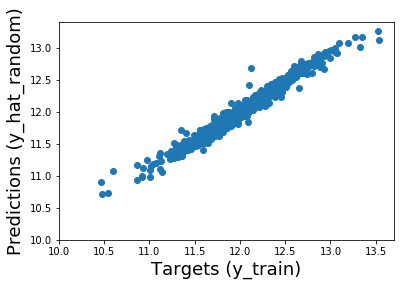

In [348]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat_random)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_random)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10)
plt.ylim(10)
plt.show()

In [349]:
# Find the R-squared of the model
Random_forest_reg_model.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9702970203953406

In [350]:
#Score/Accuracy
Random_forest_reg_model.score(x_test, y_test)

0.8611247941427989

## Test

In [351]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test_random = Random_forest_reg_model.predict(x_test)

In [352]:
#Score/Accuracy
Random_forest_reg_model.score(x_test, y_test)

0.8611247941427989

## Gradient Boosting

In [353]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_Boosting = GradientBoostingRegressor()

In [354]:
Gradient_Boosting.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [355]:
Gradient_Boosting.score(x_train,y_train)#score calculation on training set

0.9612201738883602

In [356]:
Gradient_Boosting.score(x_test,y_test)

0.8949474051001807

In [357]:
# Let's check the outputs of the regression
# I'll store them in y_hat_gradient as this is the 'theoretical' name of the predictions
y_hat_gradient = Gradient_Boosting.predict(x_train)

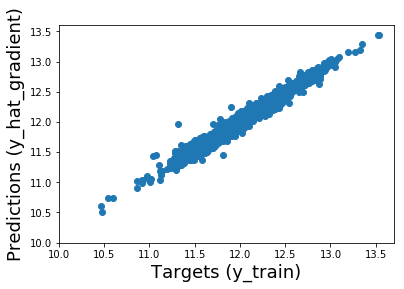

In [358]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat_gradient) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat_gradient)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_gradient)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10)
plt.ylim(10)
plt.show()

In [359]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test_gradient =Gradient_Boosting.predict(x_test)

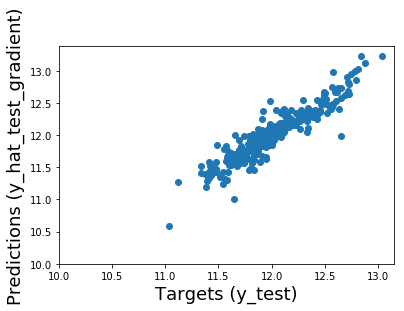

In [360]:
plt.scatter(y_hat_test_random, y_test)
# Let's also name the axes
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_gradient)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(10)
plt.ylim(10)
plt.show()

In [361]:
Gradient_Boosting.score(x_test,y_test)

0.8949474051001807

In [362]:
Gradient_Boosting.score(x_train,y_train)

0.9612201738883602